# Analysis of qualification telemetry for the Singapore Grand Prix 2022

In this notebook we are going to have a look at comparing some telemetry analysis for multiple sessions during qualifying in Singapore for the 2022 Singapore GP. 

The goal of qualifying is to set the fastest laptime over a single lap to start as close to the front of the grid for the race the following day. The higher you start on the grid the better your chances of winning the grand prix. 

The current F1 qualifying format comprises 3 rounds lasting 15mins, 12mins and 12mins respectively. 20 cars start in total and after the first session the slowest 5 cars are knocked out. After the second session a further 5 cars are knocked out leaving 10 cars remaining in the final session to contest the top spot or 'pole' position. 

In Singapore 2022 there were rapidly evolving conditions during qualifying with a wet track quickly drying and thus leading to faster lap times. This lead to a strategy challenge for the teams and unusual comparisons between the 3 sessions (which are abbreviated to Q1, Q2 and Q3 respectively). 

In this notebook we we will analyse the details of these sessions using the fast f1 package in python. 

In [1]:
# !pip install fastf1
# in case fast f1 isn't installed

# general requirements
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.collections import LineCollection

In [2]:
# Now we are going to create a cache which we can wipe after we are done
# This will speed up all the calculations as for each event a lot of data needs to be stored locally
# To do this we will create a folder in the directory we are working in called 'Cache'

# Set the cache directory (make sure to create a folder called 'Cache' in the SAME folder as this script)
ff1.Cache.enable_cache('Cache')

# Enable the fastf1 matplotlib settings
# This comes with some nice defaults to help improve the look of our graphs
# ff1.plotting.setup_mpl()

In [3]:
# Load the session and its laps
session = ff1.get_session(2022, 'Singapore', 'Q')
session.load()

core           INFO 	Loading data for Singapore Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '11', '44', '55', '14', '4', '10', '1', '20', '22', '63', '18', '47', '5', '24', '77', '3', '31', '23', '6']


N.b. this process has written a fair amount of data into our Cache folder that we made within our working directory. 

In [4]:
# Explore the lap data initially to see what is in the data we have downloaded
session.laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:20:01.116000,16,NaT,1,0 days 00:17:24.583000,NaT,NaT,0 days 00:00:59.874000,0 days 00:00:56.621000,NaT,...,INTERMEDIATE,1.0,True,1,0 days 00:17:24.583000,Ferrari,LEC,1,False,2022-10-01 13:02:24.591
1,0 days 00:21:56.170000,16,0 days 00:01:55.054000,2,NaT,NaT,0 days 00:00:30.697000,0 days 00:00:44.878000,0 days 00:00:39.479000,0 days 00:20:31.813000,...,INTERMEDIATE,2.0,True,1,0 days 00:20:01.116000,Ferrari,LEC,2,True,2022-10-01 13:05:01.124
2,0 days 00:24:29.065000,16,NaT,3,NaT,NaT,0 days 00:00:30.423000,0 days 00:01:01.698000,0 days 00:01:00.766000,0 days 00:22:26.639000,...,INTERMEDIATE,3.0,True,1,0 days 00:21:56.170000,Ferrari,LEC,2,False,2022-10-01 13:06:56.178
3,0 days 00:26:23.287000,16,0 days 00:01:54.222000,4,NaT,NaT,0 days 00:00:30.461000,0 days 00:00:44.358000,0 days 00:00:39.403000,0 days 00:24:59.526000,...,INTERMEDIATE,4.0,True,1,0 days 00:24:29.065000,Ferrari,LEC,2,True,2022-10-01 13:09:29.073
4,0 days 00:29:02.261000,16,NaT,5,NaT,NaT,0 days 00:00:45.937000,0 days 00:01:07.346000,0 days 00:00:45.679000,0 days 00:27:09.236000,...,INTERMEDIATE,5.0,True,1,0 days 00:26:23.287000,Ferrari,LEC,1,False,2022-10-01 13:11:23.295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,0 days 00:24:14.223000,6,0 days 00:01:59.492000,4,NaT,NaT,0 days 00:00:31.207000,0 days 00:00:47.023000,0 days 00:00:41.262000,0 days 00:22:45.938000,...,INTERMEDIATE,4.0,True,1,0 days 00:22:14.731000,Williams,LAT,2,True,2022-10-01 13:07:14.739
335,0 days 00:26:58.767000,6,NaT,5,NaT,0 days 00:26:50.998000,0 days 00:00:43.703000,0 days 00:01:00.262000,0 days 00:01:00.565000,0 days 00:24:57.960000,...,INTERMEDIATE,5.0,True,1,0 days 00:24:14.223000,Williams,LAT,2,False,2022-10-01 13:09:14.231
336,0 days 00:29:34.426000,6,NaT,6,0 days 00:27:21.547000,NaT,0 days 00:00:57.379000,0 days 00:00:50.803000,0 days 00:00:47.491000,0 days 00:27:56.178000,...,INTERMEDIATE,1.0,True,2,0 days 00:26:58.767000,Williams,LAT,1,False,2022-10-01 13:11:58.775
337,0 days 00:31:31.958000,6,0 days 00:01:57.532000,7,NaT,NaT,0 days 00:00:30.674000,0 days 00:00:46.091000,0 days 00:00:40.767000,0 days 00:30:05.100000,...,INTERMEDIATE,2.0,True,2,0 days 00:29:34.426000,Williams,LAT,1,True,2022-10-01 13:14:34.434


In [5]:
# Finding laps of Lewis Hamilton, a driver to progressed to all 3 sessions
laps_ham = session.laps.pick_driver('HAM')
laps_ham

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
40,0 days 00:17:16.045000,44,NaT,1,0 days 00:15:05.372000,NaT,NaT,0 days 00:00:51.004000,0 days 00:00:44.847000,NaT,...,INTERMEDIATE,1.0,True,1,0 days 00:15:05.372000,Mercedes,HAM,1,False,2022-10-01 13:00:05.380
41,0 days 00:19:12.982000,44,0 days 00:01:56.937000,2,NaT,NaT,0 days 00:00:30.956000,0 days 00:00:45.700000,0 days 00:00:40.281000,0 days 00:17:47.001000,...,INTERMEDIATE,2.0,True,1,0 days 00:17:16.045000,Mercedes,HAM,1,True,2022-10-01 13:02:16.053
42,0 days 00:21:30.938000,44,0 days 00:02:17.956000,3,NaT,NaT,0 days 00:00:33.466000,0 days 00:00:59.642000,0 days 00:00:44.848000,0 days 00:19:46.448000,...,INTERMEDIATE,3.0,True,1,0 days 00:19:12.982000,Mercedes,HAM,2,True,2022-10-01 13:04:12.990
43,0 days 00:23:25.627000,44,0 days 00:01:54.689000,4,NaT,NaT,0 days 00:00:30.450000,0 days 00:00:44.602000,0 days 00:00:39.637000,0 days 00:22:01.388000,...,INTERMEDIATE,4.0,True,1,0 days 00:21:30.938000,Mercedes,HAM,2,True,2022-10-01 13:06:30.946
44,0 days 00:25:44.775000,44,0 days 00:02:19.148000,5,NaT,NaT,0 days 00:00:36.414000,0 days 00:00:56.473000,0 days 00:00:46.261000,0 days 00:24:02.041000,...,INTERMEDIATE,5.0,True,1,0 days 00:23:25.627000,Mercedes,HAM,2,True,2022-10-01 13:08:25.635
45,0 days 00:27:51.562000,44,0 days 00:02:06.787000,6,NaT,0 days 00:27:43.668000,0 days 00:00:30.698000,0 days 00:00:44.440000,0 days 00:00:51.649000,0 days 00:26:15.473000,...,INTERMEDIATE,6.0,True,1,0 days 00:25:44.775000,Mercedes,HAM,2,False,2022-10-01 13:10:44.783
46,0 days 00:30:25.990000,44,NaT,7,0 days 00:28:15.071000,NaT,0 days 00:00:57.469000,0 days 00:00:51.272000,0 days 00:00:45.683000,0 days 00:28:49.087000,...,INTERMEDIATE,1.0,True,2,0 days 00:27:51.562000,Mercedes,HAM,1,False,2022-10-01 13:12:51.570
47,0 days 00:32:19.151000,44,0 days 00:01:53.161000,8,NaT,NaT,0 days 00:00:30.268000,0 days 00:00:43.664000,0 days 00:00:39.229000,0 days 00:30:56.258000,...,INTERMEDIATE,2.0,True,2,0 days 00:30:25.990000,Mercedes,HAM,1,True,2022-10-01 13:15:25.998
48,0 days 00:34:43.206000,44,0 days 00:02:24.055000,9,NaT,0 days 00:34:35.045000,0 days 00:00:35.111000,0 days 00:00:56.980000,0 days 00:00:51.964000,0 days 00:32:54.262000,...,INTERMEDIATE,3.0,True,2,0 days 00:32:19.151000,Mercedes,HAM,2,False,2022-10-01 13:17:19.159
49,0 days 00:43:08.955000,44,NaT,10,0 days 00:40:55.096000,NaT,NaT,0 days 00:00:48.512000,0 days 00:00:51.686000,NaT,...,INTERMEDIATE,4.0,False,3,0 days 00:34:43.206000,Mercedes,HAM,1,False,2022-10-01 13:19:43.214


In [6]:
# Finding fastest lap for hamilton
laps_ham.pick_fastest()

Time                      0 days 01:15:50.849000
DriverNumber                                  44
LapTime                   0 days 00:01:49.466000
LapNumber                                     22
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:29.169000
Sector2Time               0 days 00:00:41.186000
Sector3Time               0 days 00:00:39.111000
Sector1SessionTime        0 days 01:14:30.552000
Sector2SessionTime        0 days 01:15:11.738000
Sector3SessionTime        0 days 01:15:50.849000
SpeedI1                                    293.0
SpeedI2                                    266.0
SpeedFL                                    251.0
SpeedST                                    283.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     6.0
FreshTyre                                   True
Stint               

In [7]:
# Now we can specifically isolate the telemetry details from the fastest lap of a driver
laps_ham.pick_fastest().get_telemetry()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-10-01 13:59:01.391,0 days 01:14:01.383000,,824.588333,0 days 00:00:00,10652,256,7,100,False,9,interpolation,0.021186,0.000004,OnTrack,1061,-352,187
3,2022-10-01 13:59:01.392,0 days 01:14:01.384000,,824.588333,0 days 00:00:00.001000,10653,257,7,100,False,9,pos,0.092736,0.000018,OnTrack,1061,-352,188
4,2022-10-01 13:59:01.519,0 days 01:14:01.511000,,824.588333,0 days 00:00:00.128000,10654,258,7,100,False,9,car,9.213333,0.001834,OnTrack,1051,-291,188
5,2022-10-01 13:59:01.691,0 days 01:14:01.683000,,824.588333,0 days 00:00:00.300000,10751,259,7,100,False,9,pos,21.672357,0.004314,OnTrack,1043,-238,188
6,2022-10-01 13:59:01.719,0 days 01:14:01.711000,14,824.588333,0 days 00:00:00.328000,10848,261,7,100,False,9,car,23.713333,0.004720,OnTrack,1040,-222,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,2022-10-01 14:00:50.631,0 days 01:15:50.623000,14,644.270833,0 days 00:01:49.240000,10590,253,7,100,False,9,pos,4994.556188,0.994186,OnTrack,1100,-587,188
826,2022-10-01 14:00:50.639,0 days 01:15:50.631000,14,640.215278,0 days 00:01:49.248000,10640,254,7,100,False,9,car,4995.122500,0.994299,OnTrack,1099,-581,187
827,2022-10-01 14:00:50.791,0 days 01:15:50.783000,14,637.123611,0 days 00:01:49.400000,10684,255,7,100,False,9,pos,5005.928644,0.996450,OnTrack,1081,-475,188
828,2022-10-01 14:00:50.798,0 days 01:15:50.790000,14,634.031944,0 days 00:01:49.407000,10729,256,7,100,False,9,car,5006.429167,0.996550,OnTrack,1080,-469,188


In [8]:
# This lap is 109 seconds in total
# Our telemetry has 828 rows 
# We essentially have 7.5 data points per second
828/109

7.5963302752293576

# Now we are going to look into actually making some comparison plots in terms of telemetry

In [9]:
# Specify the drivers we want to compare
# In this instance I am going to compare two drivers who finished Q3 on fairly similar times
# but had very different times in the wet of Q1. 
driver1, driver2 = 'HAM', 'NOR'

In [10]:
# Find the overall laps for both of these drivers
driver1_laps = session.laps.pick_driver(driver1)
driver2_laps = session.laps.pick_driver(driver2)

# Find the fasest laps for each driver
driver1_fastest = driver1_laps.pick_fastest()
driver2_fastest = driver2_laps.pick_fastest()

# Get the telemetry for each driver's fastest lap
driver1_telemetry = driver1_fastest.get_telemetry()
driver2_telemetry = driver2_fastest.get_telemetry()

FF1 package has some useful utilities which include a way of unpacking telemetry details between two drivers. The details are here: https://theoehrly.github.io/Fast-F1/utils.html

Specifically in this instance we are going to be using the utils function to be able to get relative telemetry between two drivers and that should let us create some interesting comparison graphs. 

The delta_time function below unpacks into three useful objects: 

In [11]:
# Get the gap (delta time) between driver 1 and driver 2
delta_time, ref_tel, compare_tel = ff1.utils.delta_time(driver1_fastest, driver2_fastest)

In [12]:
# FF1 package has a really nice way of getting the exact correct hex codes for team colours

# Step 1: Identify team colors by getting the 'Team' from the dataframe
driver1_team = driver1_laps['Team'].iloc[0]
driver2_team = driver2_laps['Team'].iloc[0]

# Step 2: Fastf1 has a built-in function for assigning the correct team colors!
color1 = ff1.plotting.team_color(driver1_team)
color2 = ff1.plotting.team_color(driver2_team)

## Time to plot a figure comparing the telemetry data of two different drivers in the same session 

This is going to be using a fair amount of code to create a single figure which is nice in some ways as we have control over it all and can use it for downstream applications in a single file. Otherwise it might also be nice to create all the individual figures and then edit and combine them in different ways using a GUI based graphics editor like Adobe Illustrator or Inkscape. 

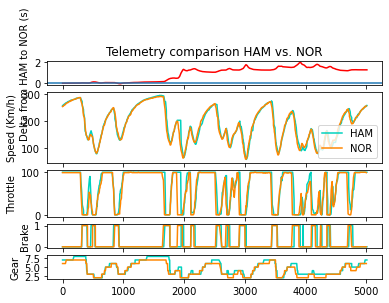

In [13]:
# Set the size of the plot 
plt.rcParams['figure.figsize'] = [50,30]  #[20, 15]

# Our plot will consist of 5 "subplots":
#     - Delta in time
#     - Speed
#     - Throttle
#     - Braking
#     - Gear

# By and large we are using either the 'telemetry' objects we made for each driver earlier (a dataframe)
# or we are using some of the output dataframes from the 'ff1.utils.delta_time' method we used earlier

# N.b. in this argument the gridspec_kw is being used to describe the specific sizes of all the panels
fig, ax = plt.subplots(5, gridspec_kw={'height_ratios': [1, 3, 2, 1, 1]})

# Set the title of the plot
# Preferable to use the formatted string so this can be used to plot telemetry of different drivers later
ax[0].title.set_text(f"Telemetry comparison {driver1} vs. {driver2}")

# Subplot 1: The delta in time between the two drivers around the lap
ax[0].plot(ref_tel['Distance'], delta_time, color='#FF0000') #Hex code for a red not associated with these drivers
ax[0].axhline(0) #just creates a horizontal line across the plot as reference
ax[0].set(ylabel=f"Delta from {driver1} to {driver2} (s)") # Labelling y axis (x axis is distance in all these plots)

# Subplot 2: Speed of driver around the lap
ax[1].plot(driver1_telemetry['Distance'], driver1_telemetry['Speed'], label=driver1, color=color1)
ax[1].plot(driver2_telemetry['Distance'], driver2_telemetry['Speed'], label=driver2, color=color2)
ax[1].set(ylabel='Speed (Km/h)')
ax[1].legend(loc="lower right")

# Subplot 3: Throttle (which is given as a decimal of full throttle)
ax[2].plot(driver1_telemetry['Distance'], driver1_telemetry['Throttle'], label=driver1, color=color1)
ax[2].plot(driver2_telemetry['Distance'], driver2_telemetry['Throttle'], label=driver2, color=color2)
ax[2].set(ylabel='Throttle')

# Subplot 4: Brake (which is given as a decimal of full brake)
ax[3].plot(driver1_telemetry['Distance'], driver1_telemetry['Brake'], label=driver1, color=color1)
ax[3].plot(driver2_telemetry['Distance'], driver2_telemetry['Brake'], label=driver2, color=color2)
ax[3].set(ylabel='Brake')

# Subplot 5: Gears 
ax[4].plot(driver1_telemetry['Distance'], driver1_telemetry['nGear'], label=driver1, color=color1)
ax[4].plot(driver2_telemetry['Distance'], driver2_telemetry['nGear'], label=driver2, color=color2)
ax[4].set(ylabel='Gear')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.savefig(f"Dry Telemetry Comparison {driver1} vs {driver2}")

Because we have taken the fastest laps for both drivers across the whole session we have essentially ended up comparing laps in Q3 which is when the track was driest. 

In this instance it is important to know what we are comparing drivers on the same tyres. This can be checked: 

In [14]:
driver2_fastest["Compound"]==driver1_fastest["Compound"]

True

In [15]:
driver2_fastest["Compound"]

'SOFT'

These laps were set on the 'soft' compound of slick tyre towards the end of qualifying. We now want to investigate how these two drivers compared in the early stages of qualifying when they were driving in the wet. To do this we will create a new dataframe where the type type is 'Intermediate'. Despite the confusing name this tyre is designed to run in wet weather. 

In [16]:
#Using the FF1 package rather than filtering in pandas
driver1_laps_wet = driver1_laps.pick_tyre('INTERMEDIATE')
driver2_laps_wet = driver2_laps.pick_tyre('INTERMEDIATE')

# # This lets us subsequently get fastest laps and telemetry again
d1_fastest_wet = driver1_laps_wet.pick_fastest(float)
d2_fastest_wet = driver2_laps_wet.pick_fastest(float)

In [17]:
# From the fastest of the wet data we can isolate the telemetry 
# This will allow us to compare the pair running in the way and look for competitive opportunities
d1_wet_telemetry = d1_fastest_wet.get_telemetry()
d2_wet_telemetry = d2_fastest_wet.get_telemetry()
d2_wet_telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-10-01 13:38:48.888,0 days 00:53:48.880000,,371.641389,0 days 00:00:00,11496,254,6,99,False,9,interpolation,0.127432,0.000026,OnTrack,1074,-432,187
3,2022-10-01 13:38:49.035,0 days 00:53:49.027000,,371.641389,0 days 00:00:00.147000,11530,255,6,99,False,9,car,10.561389,0.002118,OnTrack,1053,-308,187
4,2022-10-01 13:38:49.132,0 days 00:53:49.124000,,371.641389,0 days 00:00:00.244000,11594,256,6,99,False,9,pos,17.472183,0.003504,OnTrack,1042,-237,188
5,2022-10-01 13:38:49.235,0 days 00:53:49.227000,44,371.641389,0 days 00:00:00.347000,11659,257,6,99,False,9,car,24.839167,0.004981,OnTrack,1030,-169,188
6,2022-10-01 13:38:49.395,0 days 00:53:49.387000,44,366.441389,0 days 00:00:00.507000,11672,259,6,99,False,9,car,36.350278,0.007289,OnTrack,1016,-80,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,2022-10-01 13:40:42.435,0 days 00:55:42.427000,,5.042222,0 days 00:01:53.547000,11142,244,6,100,False,9,car,4953.560000,0.993342,OnTrack,1104,-614,188
883,2022-10-01 13:40:42.595,0 days 00:55:42.587000,,5.042222,0 days 00:01:53.707000,11142,246,6,100,False,9,car,4964.493333,0.995535,OnTrack,1093,-546,188
884,2022-10-01 13:40:42.712,0 days 00:55:42.704000,,5.042222,0 days 00:01:53.824000,11259,247,6,100,False,9,pos,4972.572507,0.997155,OnTrack,1087,-508,188
885,2022-10-01 13:40:42.755,0 days 00:55:42.747000,,5.042222,0 days 00:01:53.867000,11377,249,6,100,False,9,car,4975.560000,0.997754,OnTrack,1083,-487,187


In this instance I will just re-copy the block of code to create the figure from before. If this figure was always going to be re-used in the exact same way it might be worih making a function for this but in reality every time we are likely to slightly change what we want from the figure so for the moment we will just reproduce the code:

In [18]:
# First we need to re-use the utilities that can create the pace delta dataframes
w_delta_time, w_ref_tel, w_compare_tel = ff1.utils.delta_time(d1_fastest_wet, d2_fastest_wet)

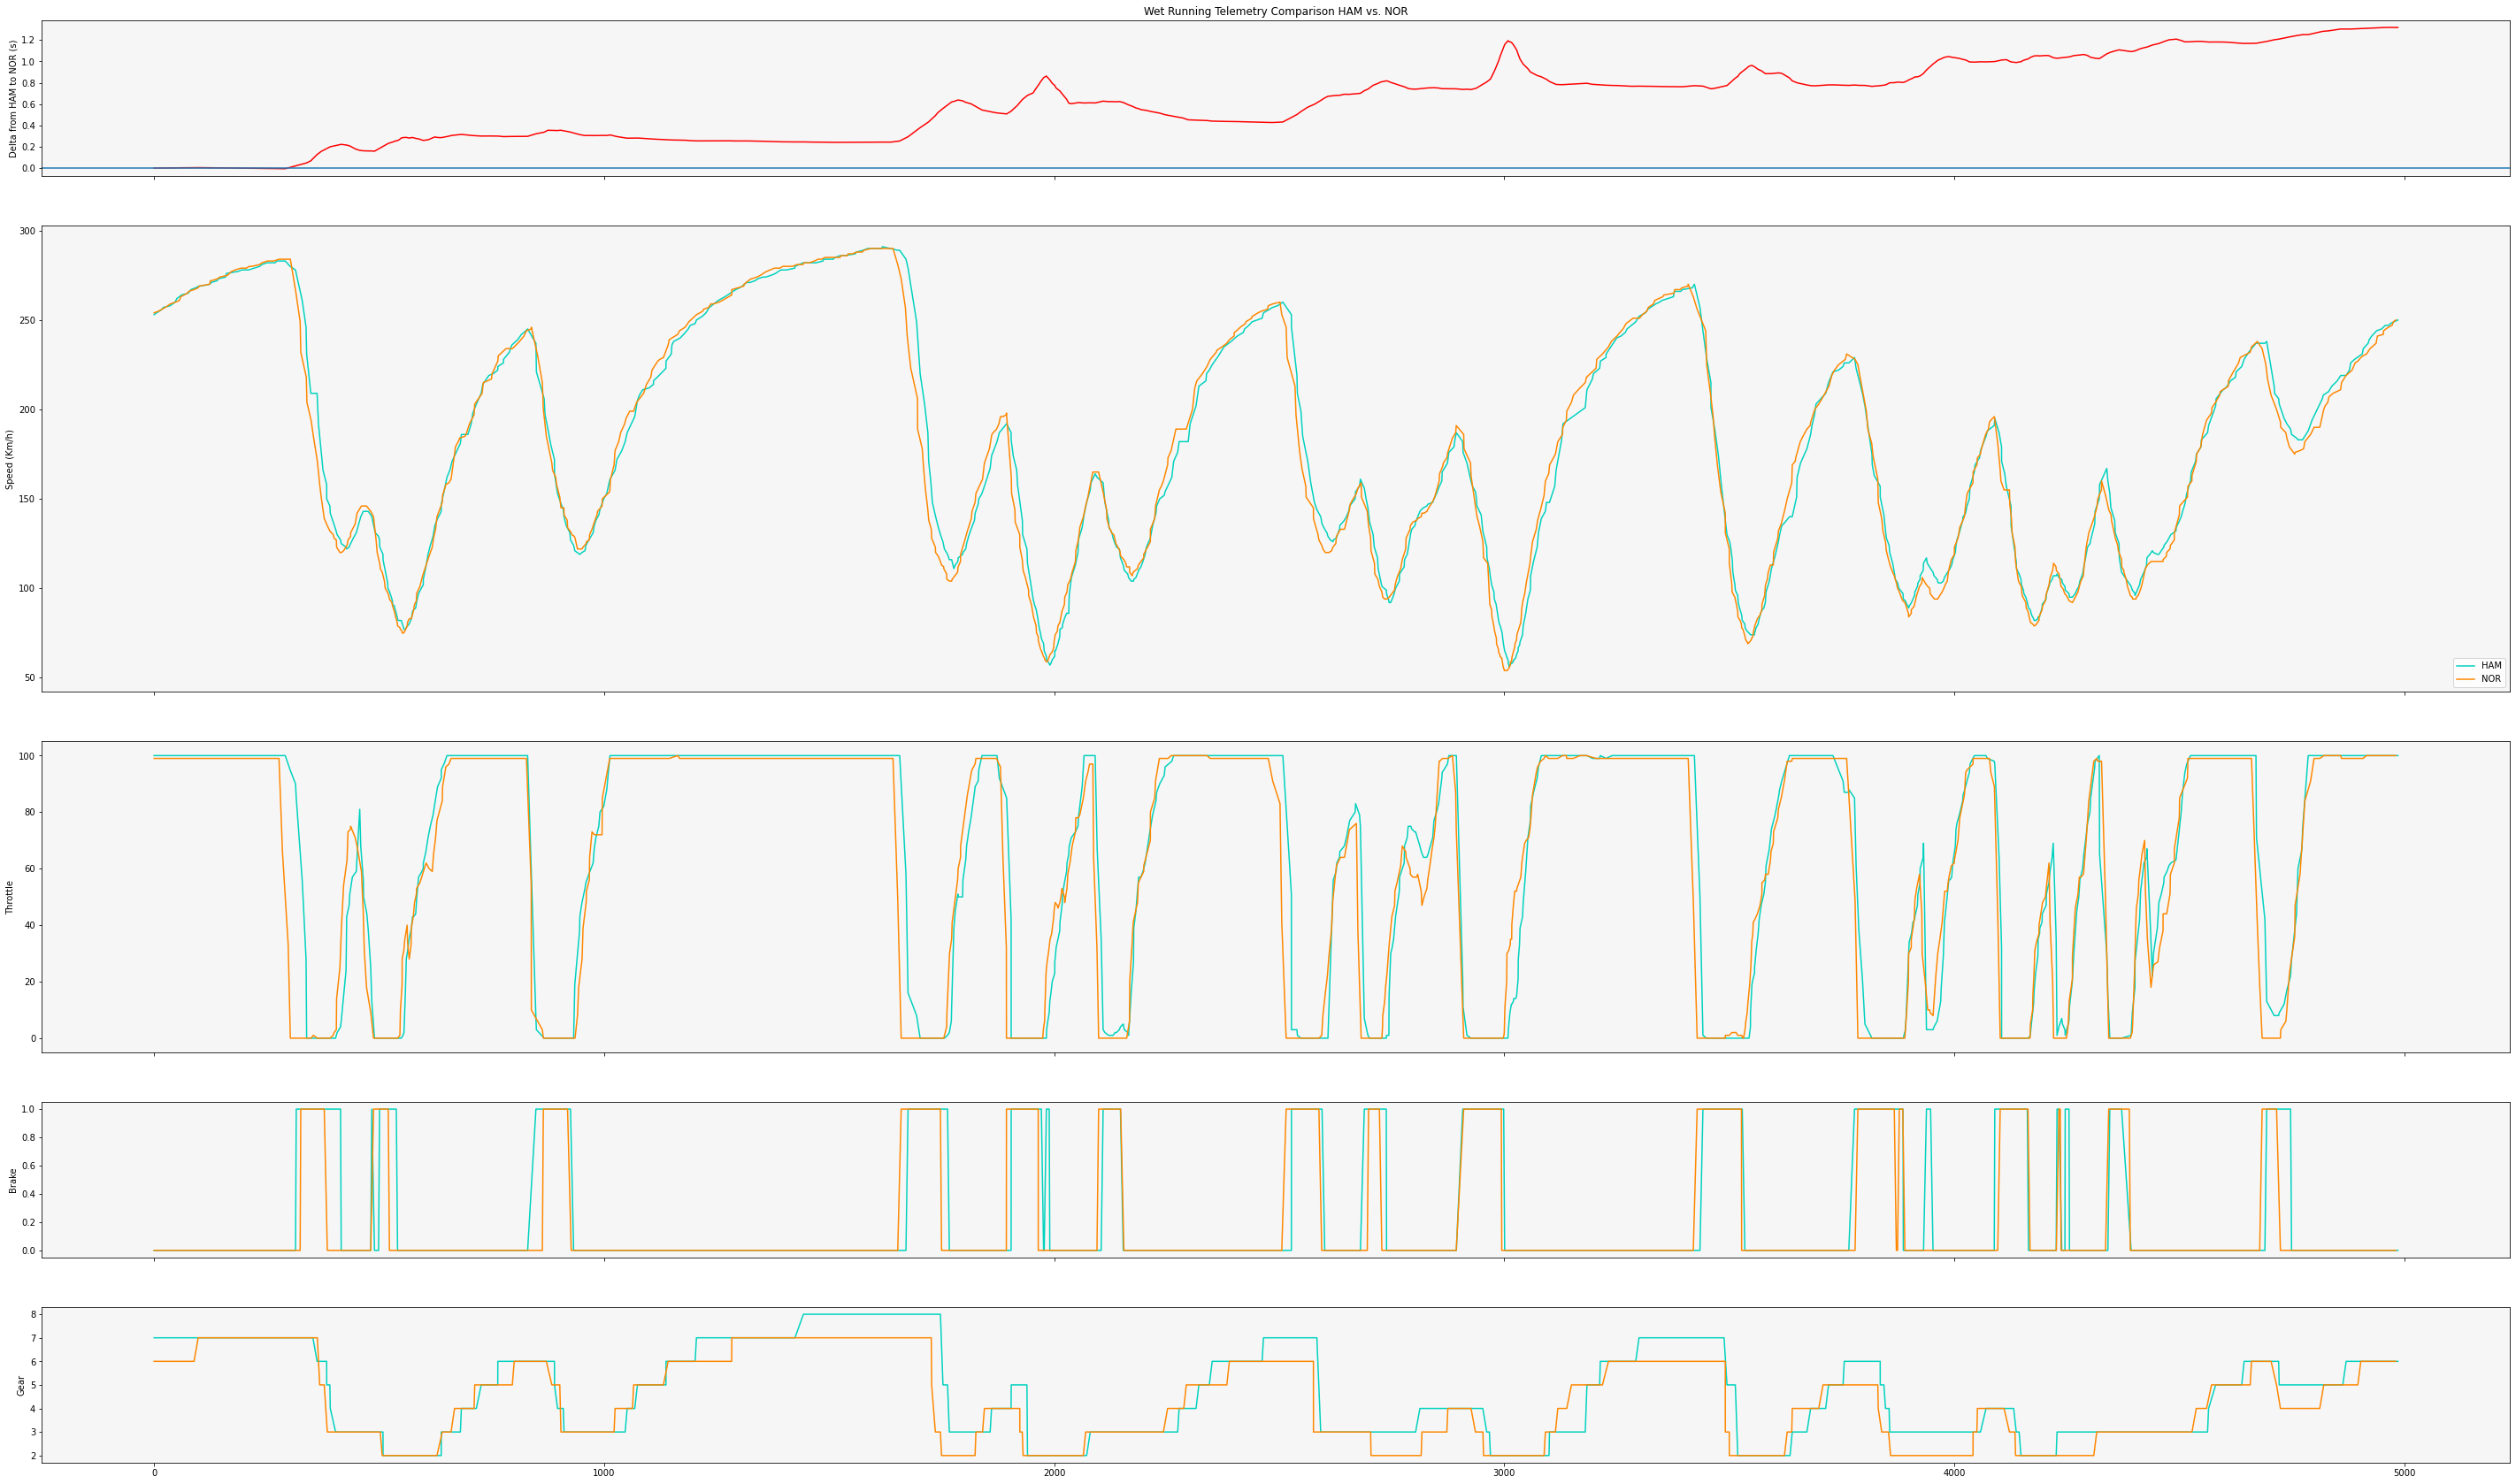

In [19]:
# Set the size of the plot 
plt.rcParams['figure.figsize'] = [50,30]  #[20, 15]

# As before our plot will consist of 5 "subplots":
#     - Delta
#     - Speed
#     - Throttle
#     - Braking
#     - Gear

# N.b. in this argument the gridspec_kw is being used to describe the specific sizes of all the panels
fig, ax = plt.subplots(5, gridspec_kw={'height_ratios': [1, 3, 2, 1, 1]})
facecolour = '#F6F6F6'

# Set the title of the plot
# Preferable to use the formatted string so this can be used to plot telemetry of different drivers later
ax[0].title.set_text(f"Wet Running Telemetry Comparison {driver1} vs. {driver2}")

# Subplot 1: The delta in time between the two drivers around the lap
ax[0].plot(w_ref_tel['Distance'], w_delta_time, color='#FF0000') #Hex code for a red not associated with these drivers
ax[0].axhline(0) #just creates a horizontal line across the plot as reference
ax[0].set(ylabel=f"Delta from {driver1} to {driver2} (s)") # Labelling y axis (x axis is distance in all these plots)
ax[0].set_facecolor(facecolour) 



# Subplot 2: Speed of driver around the lap
ax[1].plot(d1_wet_telemetry['Distance'], d1_wet_telemetry['Speed'], label=driver1, color=color1)
ax[1].plot(d2_wet_telemetry['Distance'], d2_wet_telemetry['Speed'], label=driver2, color=color2)
ax[1].set(ylabel='Speed (Km/h)')
ax[1].legend(loc="lower right")
ax[1].set_facecolor(facecolour) 


# Subplot 3: Throttle (which is given as a decimal of full throttle)
ax[2].plot(d1_wet_telemetry['Distance'], d1_wet_telemetry['Throttle'], label=driver1, color=color1)
ax[2].plot(d2_wet_telemetry['Distance'], d2_wet_telemetry['Throttle'], label=driver2, color=color2)
ax[2].set(ylabel='Throttle')
ax[2].set_facecolor(facecolour) 


# Subplot 4: Brake (which is given as a decimal of full brake)
ax[3].plot(d1_wet_telemetry['Distance'], d1_wet_telemetry['Brake'], label=driver1, color=color1)
ax[3].plot(d2_wet_telemetry['Distance'], d2_wet_telemetry['Brake'], label=driver2, color=color2)
ax[3].set(ylabel='Brake')
ax[3].set_facecolor(facecolour) 


# Subplot 5: Gears 
ax[4].plot(d1_wet_telemetry['Distance'], d1_wet_telemetry['nGear'], label=driver1, color=color1)
ax[4].plot(d2_wet_telemetry['Distance'], d2_wet_telemetry['nGear'], label=driver2, color=color2)
ax[4].set(ylabel='Gear')
ax[4].set_facecolor(facecolour) 



# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.savefig(f"Wet Running Telemetry Comparison {driver1} vs {driver2}")

Now we have completed the analysis of the telemetry from the two laps we have the opportunity to look into some of the data in. a little more detail to see if we can extract some menaningful insight from it. 

In [20]:
x_limits = [1500, 2250]

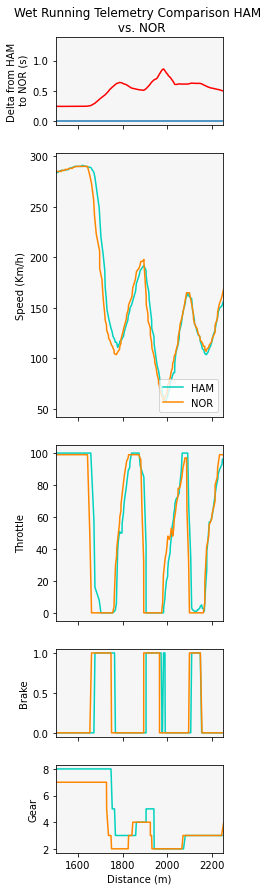

In [21]:
# We will now re-plot based on a narrow range on the track and look at specific areas where NOR loses time to HAM. 

# Set the size of the plot 
plt.rcParams['figure.figsize'] = [3,15]  #[20, 15]
facecolour = '#F6F6F6'



# N.b. in this argument the gridspec_kw is being used to describe the specific sizes of all the panels
fig, ax = plt.subplots(5, gridspec_kw={'height_ratios': [1, 3, 2, 1, 1]})


# Set the title of the plot
# Preferable to use the formatted string so this can be used to plot telemetry of different drivers later
ax[0].title.set_text(f"Wet Running Telemetry Comparison {driver1} \n vs. {driver2}")

# Subplot 1: The delta in time between the two drivers around the lap
ax[0].plot(w_ref_tel['Distance'], w_delta_time, color='#FF0000') #Hex code for a red not associated with these drivers
ax[0].axhline(0) #just creates a horizontal line across the plot as reference
ax[0].set(ylabel=f"Delta from {driver1}\n to {driver2} (s)") # Labelling y axis (x axis is distance in all these plots)
ax[0].set_xlim(x_limits)
ax[0].set_facecolor(facecolour) 
# ax[0].set_ylim([0, 0.5])


# Subplot 2: Speed of driver around the lap
ax[1].plot(d1_wet_telemetry['Distance'], d1_wet_telemetry['Speed'], label=driver1, color=color1)
ax[1].plot(d2_wet_telemetry['Distance'], d2_wet_telemetry['Speed'], label=driver2, color=color2)
ax[1].set(ylabel='Speed (Km/h)')
ax[1].legend(loc="lower right")
ax[1].set_xlim(x_limits)
ax[1].set_facecolor(facecolour) 


# Subplot 3: Throttle (which is given as a decimal of full throttle)
ax[2].plot(d1_wet_telemetry['Distance'], d1_wet_telemetry['Throttle'], label=driver1, color=color1)
ax[2].plot(d2_wet_telemetry['Distance'], d2_wet_telemetry['Throttle'], label=driver2, color=color2)
ax[2].set(ylabel='Throttle')
ax[2].set_xlim(x_limits)
ax[2].set_facecolor(facecolour) 


# Subplot 4: Brake (which is given as a decimal of full brake)
ax[3].plot(d1_wet_telemetry['Distance'], d1_wet_telemetry['Brake'], label=driver1, color=color1)
ax[3].plot(d2_wet_telemetry['Distance'], d2_wet_telemetry['Brake'], label=driver2, color=color2)
ax[3].set(ylabel='Brake')
ax[3].set_xlim(x_limits)
ax[3].set_facecolor(facecolour) 

# Subplot 5: Gears 
ax[4].plot(d1_wet_telemetry['Distance'], d1_wet_telemetry['nGear'], label=driver1, color=color1)
ax[4].plot(d2_wet_telemetry['Distance'], d2_wet_telemetry['nGear'], label=driver2, color=color2)
ax[4].set(ylabel='Gear')
ax[4].set(xlabel='Distance (m)')
ax[4].set_xlim(x_limits)
ax[4].set_facecolor(facecolour) 



# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.savefig(f"Wet Running Telemetry Detailed Comparison {driver1} vs {driver2}")

# Detailed analysis of HAM vs NOR in key lap region

A large amount of the time lost by Lando Norris (NOR) to Lewis Hamilton (HAM) occurs in a short region of the lap. Now we can actually look into this specific region in the telemetry in a little more detail. The region shown represents a 500m stretch on the circuit (starting at around 1600m into the lap and ending at around 2100m into the lap). 

This is the first part of the lap where HAM starts to pull out a significant time gap on NOR. By looking closely at the telemetry in this region we can have some idea of how and why this is happening. 

## Braking advantages

This section involves heavy braking, followed by a period of acceleration and then another region of heavy braking. This pattern indicates to us that most of the laptime is being lost between two corners.  

HAM is gaining significant time on NOR in both braking zones (the light blue line is shifted higher compared to the orange line, indicating a higher speed at the same position on the track). HAM is making a making a larger gain on the brakes at the first corner, with breaking for the second corner much more similar between the two drivers. In both instances HAM consistently comes down through the gears slower, indicating either a significant difference in gearing between the two cars or more confidence on the brakes and a lower reliance on engine braking for HAM. 

However during the short acceleration after the first corner NOR gains some time back, suggesting that he is following a 'slow in fast out philosophy' where breaking hard earlier positions the car for better mid corner and exit speed. 

NOR is able to accelerate faster out of the first corner and reach a higher speed before the second corner. This is indicated by a sharper gradient for the orange line in the speed telemetry in this region as well as a higher peak speed, which is reflected in a reduction in the 'delta time' between the two drives in this short region. 

However, overall that small gain does not offset the amount of time lost under braking to HAM who comes out ahead through this corner overall. 

## Trail braking and turn in approach

A striking difference between the two drivers in the wet is the way the drivers release the accelerator and apply the brakes. HAM applies the brakes significantly later in this section than NOR but has some slight overlap between braking and accellerating. Just as HAM is about to apply full braking there is a slight application of the throttle which may contribute to positioning the car and maximising grip into the corner through trail-breaking. 

NOR's telemetry shows no evidence of such an approach. 

In the second braking zone in this corner complex there are strong oscillations in HAM's braking indicating he may be locking up, losing grip and losing time. Without this mistake it is possible the gap would have been larger. 


## Throttle application and available grip

The very sharp changes in velocity in these traces indicate that these are likely heavy braking zones with quick acceleration out rather than long sweeping corners. This is consistent with the nature of Singapore as a street track. As a result much of the available pace advantage results from available grip when braking or directly accelerating, rather than at high speeds mid corner in this complex.

Although we have seen HAM has a distinct advantage on the brakes in this region, the smooth application of the throttle for NOR indicates that he has more confidence in the available grip under acceleration than HAM. This is reflected in the 'blip' during throttle application for HAM as he accelerates, resulting in NOR closing down the overall time delta between the drivers in this region.   


## Final concluding analysis of complex

It would appear that in this section HAM pulls out a large amount of his advantage over NOR by being more confident on the brakes. The telemetry for this section suggests that a difference in technique may explain some of this difference with HAM adopting an approach involving more 'trail braking' than NOR and possibly relying less on engine braking based on gearing. NOR has an advantage under acceleration but this is not sufficient to overcome the deficit during braking.  

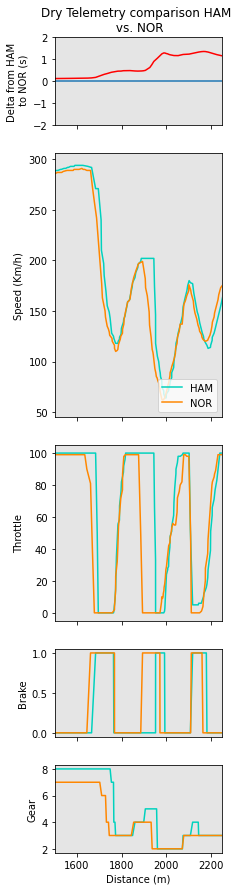

In [22]:
# Set the size of the plot 
plt.rcParams['figure.figsize'] = [3,15]  #[20, 15]

facecolour = '#E5E5E5'


# N.b. in this argument the gridspec_kw is being used to describe the specific sizes of all the panels
fig, ax = plt.subplots(5, gridspec_kw={'height_ratios': [1, 3, 2, 1, 1]})
ax[0].set_facecolor(facecolour) 

# Set the title of the plot
# Preferable to use the formatted string so this can be used to plot telemetry of different drivers later
ax[0].title.set_text(f"Dry Telemetry comparison {driver1} \n vs. {driver2}")

# Subplot 1: The delta in time between the two drivers around the lap
ax[0].plot(ref_tel['Distance'], delta_time, color='#FF0000') #Hex code for a red not associated with these drivers
ax[0].axhline(0) #just creates a horizontal line across the plot as reference
ax[0].set(ylabel=f"Delta from {driver1}\n to {driver2} (s)") # Labelling y axis (x axis is distance in all these plots)
ax[0].set_xlim(x_limits)
ax[0].set_ylim(-2,2)
ax[0].set_facecolor(facecolour) 
# ax[0].set_ylim()


# Subplot 2: Speed of driver around the lap
ax[1].plot(driver1_telemetry['Distance'], driver1_telemetry['Speed'], label=driver1, color=color1)
ax[1].plot(driver2_telemetry['Distance'], driver2_telemetry['Speed'], label=driver2, color=color2)
ax[1].set(ylabel='Speed (Km/h)')
ax[1].legend(loc="lower right")
ax[1].set_xlim(x_limits)
ax[1].set_facecolor(facecolour)  


# Subplot 3: Throttle (which is given as a decimal of full throttle)
ax[2].plot(driver1_telemetry['Distance'], driver1_telemetry['Throttle'], label=driver1, color=color1)
ax[2].plot(driver2_telemetry['Distance'], driver2_telemetry['Throttle'], label=driver2, color=color2)
ax[2].set(ylabel='Throttle')
ax[2].set_xlim(x_limits)
ax[2].set_facecolor(facecolour) 


# Subplot 4: Brake (which is given as a decimal of full brake)
ax[3].plot(driver1_telemetry['Distance'], driver1_telemetry['Brake'], label=driver1, color=color1)
ax[3].plot(driver2_telemetry['Distance'], driver2_telemetry['Brake'], label=driver2, color=color2)
ax[3].set(ylabel='Brake')
ax[3].set_xlim(x_limits)
ax[3].set_facecolor(facecolour)  


# Subplot 5: Gears 
ax[4].plot(driver1_telemetry['Distance'], driver1_telemetry['nGear'], label=driver1, color=color1)
ax[4].plot(driver2_telemetry['Distance'], driver2_telemetry['nGear'], label=driver2, color=color2)
ax[4].set(ylabel='Gear')
ax[4].set(xlabel='Distance (m)')
ax[4].set_xlim(x_limits)
ax[4].set_facecolor(facecolour)  



# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()
    
plt.savefig(f"Detailed Dry Telemetry Comparison {driver1} vs {driver2}")

# Analysis of same key region in dry

In the dry this region also represents a significant area of gain for HAM over NOR. Despite significantly different conditions in the two sessions and a much larger advantage for the Mercedes in the dry than in the wet it is interesting that the nature of the advantage remains similar. 

Once again HAM is much later on the brakes for both of the corners in the complex, with this effect especially marked in the second corner where he is on the brakes tens of meters later and still manages to reduce his speed to a similar minimum speed as NOR. 

Once again HAM appears to be less reliant on engine braking and is consistenly waiting until later in the run in to the corner to change down through the gears. Overall there is a large reduction in the total time spent braking by HAM in this region compared to NOR.

This reduced time on the brakes is mirrored by more time spent at full throttle in this region by HAM than NOR. Notably, unlike in the wet, HAM appears to have more available grip under both braking and acceleration. This is reflected in the fact that in this complex in the dry NOR doesn't regain any significant amount of the defecit under acceleration as he did in the wet. 